In [22]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['feature_names', 'data', 'DESCR', 'target_names', 'target'])

In [4]:
model = KMeans(n_clusters=3)

In [5]:
model.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
labels = model.predict(iris.data)

In [7]:
xs = iris.data[:,0]
ys = iris.data[:,2]

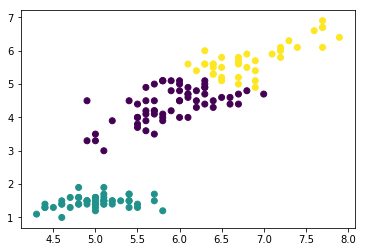

In [8]:
plt.scatter(xs, ys, c=labels)

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [11]:
df = pd.DataFrame({'labels': labels, 'species': iris.target})

In [12]:
ct = pd.crosstab(df['labels'], df['species'])

In [13]:
print(ct)

species   0   1   2
labels             
0         0  48  14
1        50   0   0
2         0   2  36


In [14]:
clusters = range(1,10)
inertias = []

In [15]:
for cluster in clusters:
    model = KMeans(n_clusters=cluster)
    model.fit(iris.data)
    inertias.append(model.inertia_)

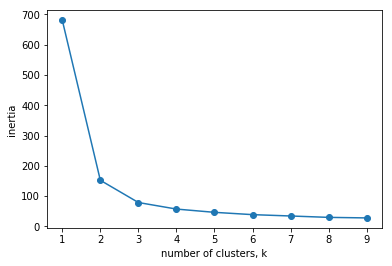

In [16]:
plt.plot(clusters, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(clusters)
plt.show()

### t-SNE maps samples to 2D (or 3D) space from a higher dimensional space. Map approximately preserves nearness of sample. Great for inspecting dataset

In [17]:
iris.keys()

dict_keys(['feature_names', 'data', 'DESCR', 'target_names', 'target'])

In [32]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(iris.data)

In [33]:
xs = transformed[:,0]
ys = transformed[:,1]

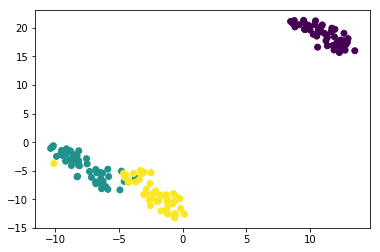

In [34]:
plt.scatter(xs, ys, c=iris.target)